<h1 style="color:cornflowerblue">Objectives</h1>
<p>The current project must check the Churn Rate (% of cliens that may leave the company) and classify them. To do that he study must check the data in a database with clients that already left the company, a historic database. In the end, the clients must be classied in "churn" (will leave) and "not churn" (will stay).

<h1 style="color:cornflowerblue">Importing Libraries</h1>

In [2]:
# Basic Visualization
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Data Processing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Models
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgbm
from sklearn.ensemble import HistGradientBoostingClassifier as hgbc
from sklearn.impute import KNNImputer


# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
# from sklearn.metrics import confusion_matrix


In [3]:
# Configuring Pandas

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)


# Configuring pandas no to to show cientific notation

pd.set_option("display.float_format", lambda x: "%.2f" % x)

<h1 style="color:cornflowerblue">Dataframe</h1>

In [4]:
# Importing Dataframe

df_clients = pd.read_csv("./data/train.csv")
df_clients.head()

,id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4030,Female,0,No,No,56.00,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0
1,6731,Male,0,Yes,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
2,6479,Female,0,Yes,No,60.00,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0
3,6861,Female,0,No,No,37.00,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
4,3266,Male,0,Yes,Yes,29.00,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1


In [5]:
# Checking the column names

df_clients.columns

Index(['id', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
# Checking if the id columns is has only unique values

df_clients["id"].is_unique

True

<h2 style="color:cornflowerblue">First Impression</h2>
<p>No duplicated clientes are inputed. The structure of the dataframe contains:
    <ul type=disc>
    <li>id - clients identification
    <li>gender - clients gender
    <li>SeniorCitizen - shows if the client is elderly
    <li>Partner - shows if the client has a partner
    <li>Dependents - shows if the client has dependents
    <li>tenure - shows for how long is a client
    <li>PhoneService - indicate if the client has a phone service
    <li>MultipleLines - indicate if the client has multiple phone services
    <li>InternetService - indicate if the client has internet service
    <li>OnlineSecurity - indicate if the client has a internet security service
    <li>OnlineBackup - indicate if the client has a backup service
    <li>DeviceProtection - indicate if the client has a device protection service
    <li>TechSupport - indicate if the client has technical support service
    <li>StreamingTV - indicate if the client has a TV streaming service
    <li>StreamingMovies - indicate if the client has a Streaming service
    <li>Contract - indicate the type of contract of the client
    <li>PaperlessBilling - indicate if the client has a paper billing or not (electronic)
    <li>PaymentMethod - indicate payment method
    <li>MonthlyCharges - indicate monthly value of the service
    <li>TotalCharges - indicate the total value of the contract
    <li>Churn - indicate if left the company or not

In [7]:
# Making the client ID the index

df_clients = df_clients.set_index("id")


# Making all columns start with a capital letter
df_clients.columns = [columns.capitalize() for columns in df_clients.columns.tolist()]

df_clients.head()

,Gender,Seniorcitizen,Partner,Dependents,Tenure,Phoneservice,Multiplelines,Internetservice,Onlinesecurity,Onlinebackup,Deviceprotection,Techsupport,Streamingtv,Streamingmovies,Contract,Paperlessbilling,Paymentmethod,Monthlycharges,Totalcharges,Churn
id,,,,,,,,,,,,,,,,,,,,
4030,Female,0,No,No,56.00,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0
6731,Male,0,Yes,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
6479,Female,0,Yes,No,60.00,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0
6861,Female,0,No,No,37.00,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
3266,Male,0,Yes,Yes,29.00,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1


In [8]:
# Checking the Dataframe Shape

df_clients.shape

(5634, 20)

In [9]:
# Checking Data Types and null values

df_clients.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5634 entries, 4030 to 103
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            5634 non-null   object 
 1   Seniorcitizen     5634 non-null   int64  
 2   Partner           5634 non-null   object 
 3   Dependents        5416 non-null   object 
 4   Tenure            5173 non-null   float64
 5   Phoneservice      5634 non-null   object 
 6   Multiplelines     5634 non-null   object 
 7   Internetservice   5634 non-null   object 
 8   Onlinesecurity    5634 non-null   object 
 9   Onlinebackup      5634 non-null   object 
 10  Deviceprotection  5634 non-null   object 
 11  Techsupport       5634 non-null   object 
 12  Streamingtv       5634 non-null   object 
 13  Streamingmovies   5634 non-null   object 
 14  Contract          5634 non-null   object 
 15  Paperlessbilling  5634 non-null   object 
 16  Paymentmethod     5535 non-null   object 
 17

In [10]:
# TotalCharges columns shouldn't have object data type. Checking values and quantities

x = 0
for i in df_clients.index:
    try:
        float(df_clients.loc[i, "Totalcharges"])
    except:
        print(f"Index: {i} -- Value: {df_clients.loc[i, 'Totalcharges']}")
        x += 1
print(f"Number of NaN: {x}")

Index: 6755 -- Value:  
Index: 5219 -- Value:  
Index: 6671 -- Value:  
Index: 937 -- Value:  
Index: 3827 -- Value:  
Index: 1083 -- Value:  
Index: 3332 -- Value:  
Index: 1341 -- Value:  
Number of NaN: 8


In [11]:
# Replacing strings (spaces) found in the TotalCharges columns to transform the column in float
# \s+ means String of whitespaces
# \S+ means String of non-whitespaces

df_clients["Totalcharges"] = df_clients["Totalcharges"].replace("\s+", "", regex=True)
df_clients["Totalcharges"] = pd.to_numeric(df_clients["Totalcharges"], errors="coerce")
df_clients.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5634 entries, 4030 to 103
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            5634 non-null   object 
 1   Seniorcitizen     5634 non-null   int64  
 2   Partner           5634 non-null   object 
 3   Dependents        5416 non-null   object 
 4   Tenure            5173 non-null   float64
 5   Phoneservice      5634 non-null   object 
 6   Multiplelines     5634 non-null   object 
 7   Internetservice   5634 non-null   object 
 8   Onlinesecurity    5634 non-null   object 
 9   Onlinebackup      5634 non-null   object 
 10  Deviceprotection  5634 non-null   object 
 11  Techsupport       5634 non-null   object 
 12  Streamingtv       5634 non-null   object 
 13  Streamingmovies   5634 non-null   object 
 14  Contract          5634 non-null   object 
 15  Paperlessbilling  5634 non-null   object 
 16  Paymentmethod     5535 non-null   object 
 17

In [12]:
# Checking missing values

for i in df_clients.columns:
    print(f'{i} - {df_clients[i].isna().value_counts()}\n')

Gender - Gender
False    5634
Name: count, dtype: int64

Seniorcitizen - Seniorcitizen
False    5634
Name: count, dtype: int64

Partner - Partner
False    5634
Name: count, dtype: int64

Dependents - Dependents
False    5416
True      218
Name: count, dtype: int64

Tenure - Tenure
False    5173
True      461
Name: count, dtype: int64

Phoneservice - Phoneservice
False    5634
Name: count, dtype: int64

Multiplelines - Multiplelines
False    5634
Name: count, dtype: int64

Internetservice - Internetservice
False    5634
Name: count, dtype: int64

Onlinesecurity - Onlinesecurity
False    5634
Name: count, dtype: int64

Onlinebackup - Onlinebackup
False    5634
Name: count, dtype: int64

Deviceprotection - Deviceprotection
False    5634
Name: count, dtype: int64

Techsupport - Techsupport
False    5634
Name: count, dtype: int64

Streamingtv - Streamingtv
False    5634
Name: count, dtype: int64

Streamingmovies - Streamingmovies
False    5634
Name: count, dtype: int64

Contract - Contract


<h1 style="color:cornflowerblue">Basic Statistics</h1>

In [13]:
# Checking basic statistics of numeric columns

df_clients.describe()

,Seniorcitizen,Tenure,Monthlycharges,Totalcharges,Churn
count,5634.00,5173.00,5634.00,5626.00,5634.00
mean,0.16,32.33,64.63,2273.51,0.27
std,0.37,24.46,30.02,2258.38,0.44
min,0.00,0.00,18.25,18.80,0.00
25%,0.00,9.00,35.46,401.59,0.00
50%,0.00,29.00,70.25,1396.12,0.00
75%,0.00,55.00,89.80,3764.29,1.00
max,1.00,72.00,118.75,8684.80,1.00


In [14]:
# Changing basic statistics to percentile

df_clients.describe(percentiles=np.linspace(0, 1, 11))

,Seniorcitizen,Tenure,Monthlycharges,Totalcharges,Churn
count,5634.00,5173.00,5634.00,5626.00,5634.00
mean,0.16,32.33,64.63,2273.51,0.27
std,0.37,24.46,30.02,2258.38,0.44
min,0.00,0.00,18.25,18.80,0.00
0%,0.00,0.00,18.25,18.80,0.00
10%,0.00,2.00,20.05,85.50,0.00
20%,0.00,6.00,25.10,267.00,0.00
30%,0.00,12.00,45.80,550.98,0.00
40%,0.00,20.00,58.60,939.80,0.00
50%,0.00,29.00,70.25,1396.12,0.00


<h2 style="color:cornflowerblue">Information From the Dataframe</h2>
<p>Both 'SeniorCitizen' and 'Churn' columns show in the descritive statistics, but they are binary values (0 and 1) so there's no new information on these two columns..</p>
<p>The 'Tenure' column show for how long each customer is a client (in months). The highest is 72 and the minimum is 0.</p>
<p>The 'MonthlyCharges' shows the monthly income of customers. On average, each customer spends 64.63 (mean), with 70.25 as median. The minimum and maximum values are 18.25 and 118.75.</p>
<p>The 'TotalCharges' the total amount paid by each customer.  On average, each customer spent 2273.51 (mean), with 1396.12 as median. The minimum and maximum values are 18.80 and 8684.8.</p>

<h2 style="color:cornflowerblue">Analyzing Tenure</h2>

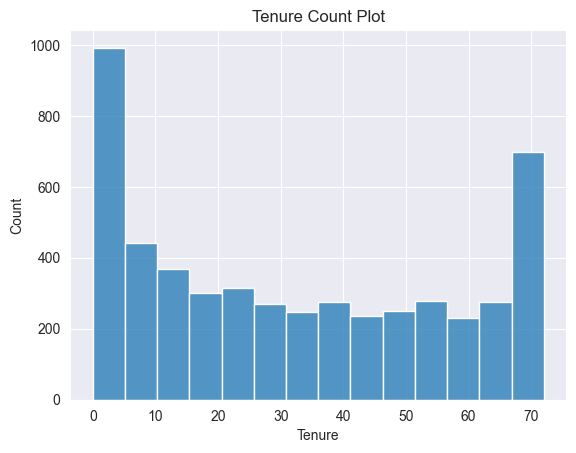

In [15]:
# Columns plot to analyse the distribution of the Tenure information.

sns.set_style("darkgrid")
tenure_plot = sns.histplot(data=df_clients, x="Tenure")
tenure_plot.set_xlabel("Tenure")
tenure_plot.set_ylabel("Count")
tenure_plot.set_title("Tenure Count Plot")
plt.show()


In [16]:
# Several values near 0. Evaluating them:
print(f"=0: {len(df_clients[df_clients['Tenure'] == 0])}")
print(f"<5: {len(df_clients[df_clients['Tenure'] <= 5])}")

=0: 8
<5: 992


In [17]:
# % of customers with less than 5 months as clients

len(df_clients[df_clients["Tenure"] <= 5]) * 100/df_clients.shape[0]

17.607383741569045

<h3 style="color:cornflowerblue">Tenure Insights</h3>
<p>Several values near 0 and higher than 65 (in months).</p>
<p>For the values near 0, it can indicate a growing in the company</p>
<p>About 17% of the client base is a customer for less than 5 months</p>
<p>For the values near 70, it can indicate that clients with more than 70 are grouped so the total amount of clients could be displayed.</p>
<p>These are not inferences, just possibilities for the presented numbers<p>

<h2 style="color:cornflowerblue">Analyzing Monthly Charges</h2>

Text(0.5, 1.0, 'Montly Charge Plot')

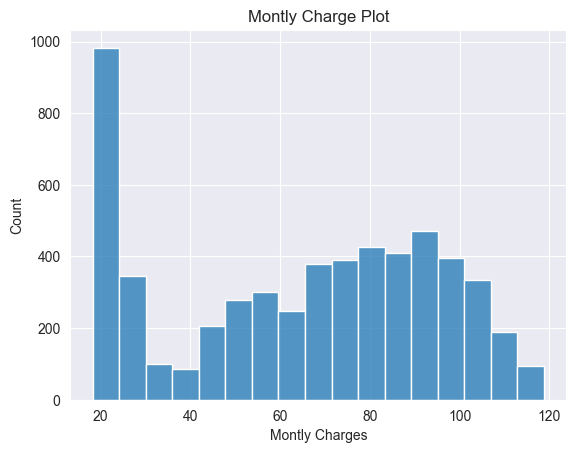

In [18]:
# Monthly Charge Analysis

sns.set_style("darkgrid")
moncharges_plot = sns.histplot(data=df_clients, x="Monthlycharges")
moncharges_plot.set_xlabel("Montly Charges")
moncharges_plot.set_ylabel("Count")
moncharges_plot.set_title("Montly Charge Plot")

<h3 style="color:cornflowerblue">Montly Charge Insights</h3>
<p>Several values near 20.</p>
<p>From 40 to 90, there is a increase in customers.</p>

<h2 style="color:cornflowerblue">Analyzing Total Charges</h2>

Text(0.5, 1.0, 'Total Charges Plot')

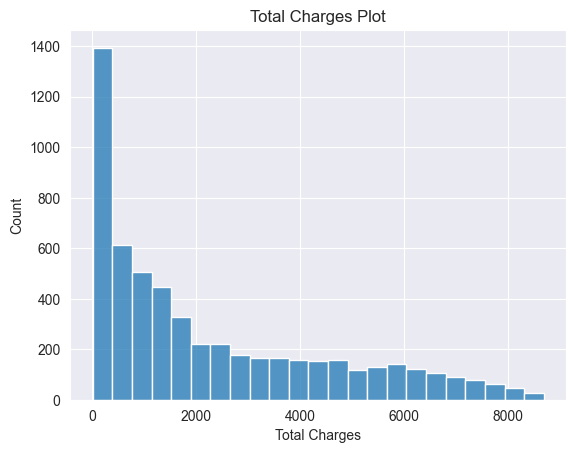

In [19]:
# Analysis of TotalCharges

sns.set_style("darkgrid")
totalcharges_plot = sns.histplot(data=df_clients, x="Totalcharges")
totalcharges_plot.set_xlabel("Total Charges")
totalcharges_plot.set_ylabel("Count")
totalcharges_plot.set_title("Total Charges Plot")

<h3 style="color:cornflowerblue">Total Charge Insights</h3>
<p>Expected curve, since it should be normal to less people to be a long term customer.</p>

<h2 style="color:cornflowerblue">Analyzing Churn</h2>

Text(0.5, 1.0, 'Churn Plot')

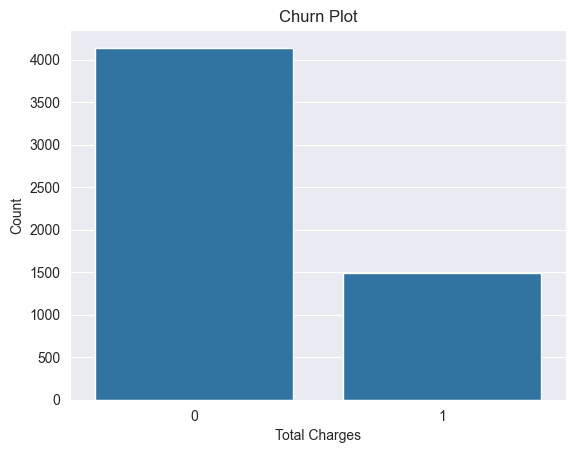

In [20]:
# Analysis of Churn

sns.set_style("darkgrid")
totalcharges_plot = sns.countplot(data=df_clients, x="Churn")
totalcharges_plot.set_xlabel("Total Charges")
totalcharges_plot.set_ylabel("Count")
totalcharges_plot.set_title("Churn Plot")

In [21]:
print(f"Not Churn:  {len(df_clients[df_clients['Churn'] == 0])}, Churn: {len(df_clients[df_clients['Churn'] == 1])}")

Not Churn:  4139, Churn: 1495


In [22]:
# % of clients that are loyal (Not Churn)

100*len(df_clients[df_clients['Churn'] == 0])/df_clients.shape[0]

73.46467873624424

<h3 style="color:cornflowerblue">Churn Insights</h3>
<p>Not a balanced base</p>
<p>Model metrics must be selected based on these insights</p>
<p>If the models only says that the client wont leave the company, it gets right at 73.5% of the times</p>
<p>Model accuracy must be higher than 73.5% - Also, since the class is not balanced, the model accuracy is probably not a good metric.</p>

<h2 style="color:cornflowerblue">Relations Between Features and the Target Variable</h2>
<p>Checking the dispersion of the predictive variables with the target variables</p>

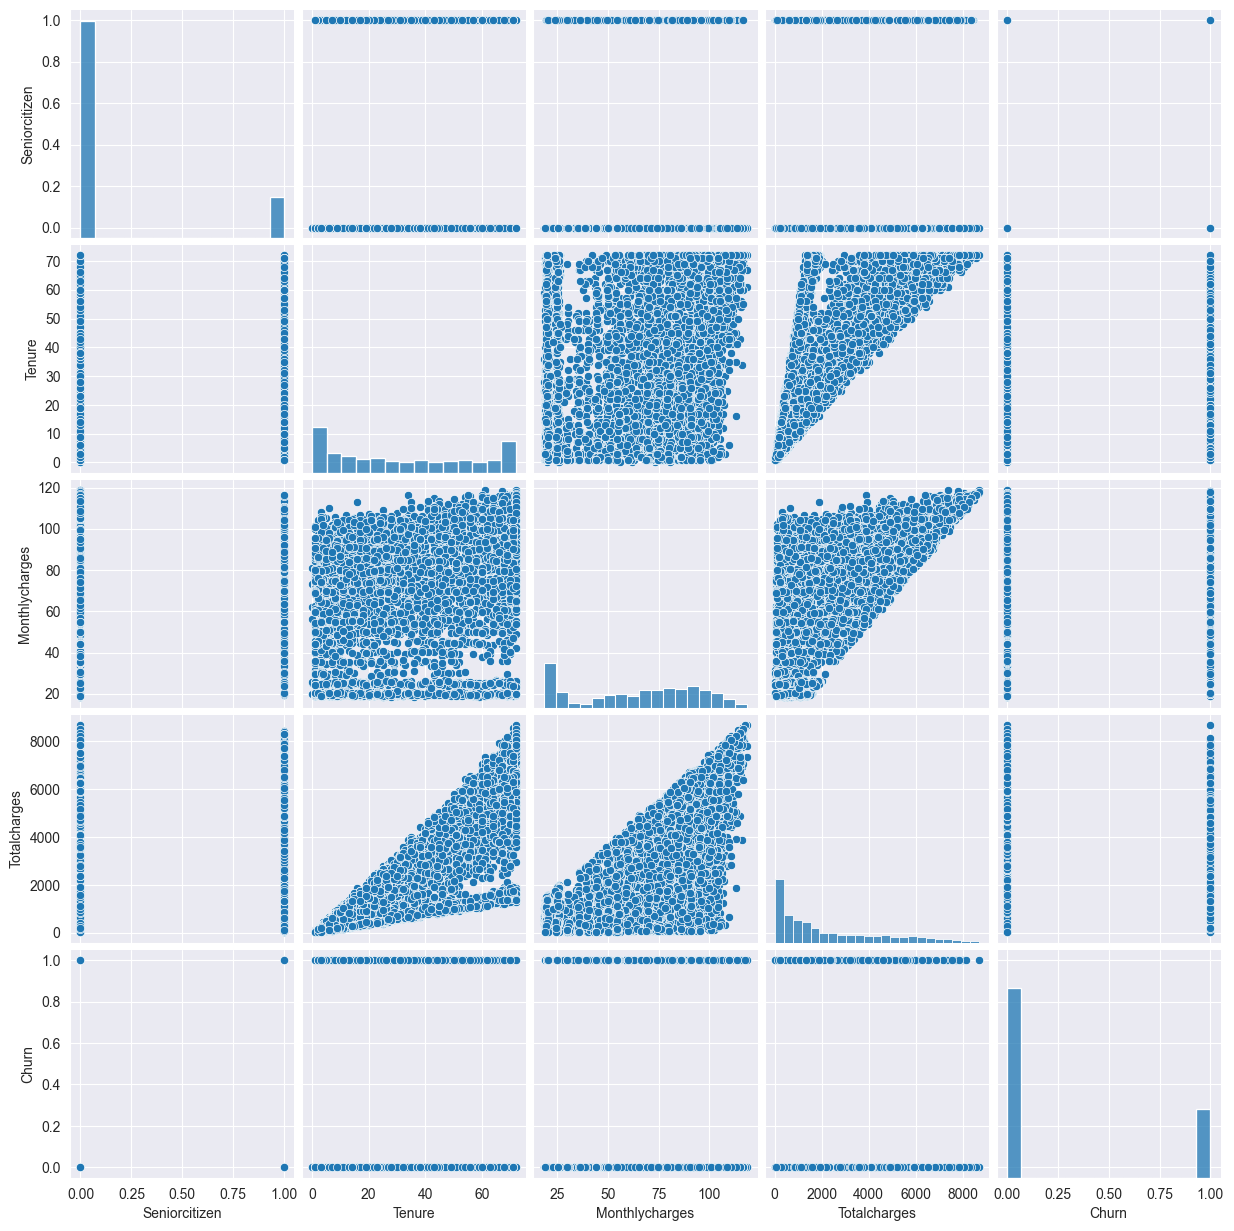

In [23]:
# Analyzing the relation of predictive variables with the target variable

sns.pairplot(data=df_clients)

<h3 style="color:cornflowerblue">Relation Between Features Insights</h3>
<p>There's no clear relation with the target variable. We can see that the tenure and total charges are related, but other than that, no clear relations with the target variable were found.


<h1 style="color:cornflowerblue">Dealing with Categorical Features</h1>
<p>The categorical features must, somehow, be translated to numerical features in order for the model to proper work.</p>

In [24]:
# Checking Dataframe

df_clients.dtypes

Gender               object
Seniorcitizen         int64
Partner              object
Dependents           object
Tenure              float64
Phoneservice         object
Multiplelines        object
Internetservice      object
Onlinesecurity       object
Onlinebackup         object
Deviceprotection     object
Techsupport          object
Streamingtv          object
Streamingmovies      object
Contract             object
Paperlessbilling     object
Paymentmethod        object
Monthlycharges      float64
Totalcharges        float64
Churn                 int64
dtype: object

In [25]:
# Getting list of categorical values
# [objects for objects in df_clients.columns if column not in df_clients._get_numeric_data()]

categ_cols = [objects for objects in df_clients.columns[df_clients.dtypes[df_clients.columns.to_list()] == "object"]]
categ_cols

['Gender',
 'Partner',
 'Dependents',
 'Phoneservice',
 'Multiplelines',
 'Internetservice',
 'Onlinesecurity',
 'Onlinebackup',
 'Deviceprotection',
 'Techsupport',
 'Streamingtv',
 'Streamingmovies',
 'Contract',
 'Paperlessbilling',
 'Paymentmethod']

In [26]:
# Checking values of categorical columns

for i in categ_cols:
    print(f"Unique Values: {df_clients[i].value_counts(dropna=False)}\n")

Unique Values: Gender
Male      2849
Female    2785
Name: count, dtype: int64

Unique Values: Partner
No     2902
Yes    2732
Name: count, dtype: int64

Unique Values: Dependents
No     3793
Yes    1623
NaN     218
Name: count, dtype: int64

Unique Values: Phoneservice
Yes    5082
No      552
Name: count, dtype: int64

Unique Values: Multiplelines
No                  2692
Yes                 2390
No phone service     552
Name: count, dtype: int64

Unique Values: Internetservice
Fiber optic    2451
DSL            1959
No             1224
Name: count, dtype: int64

Unique Values: Onlinesecurity
No                     2763
Yes                    1647
No internet service    1224
Name: count, dtype: int64

Unique Values: Onlinebackup
No                     2488
Yes                    1922
No internet service    1224
Name: count, dtype: int64

Unique Values: Deviceprotection
No                     2480
Yes                    1930
No internet service    1224
Name: count, dtype: int64

Unique 

<h2 style="color:cornflowerblue">Gender Column</h2>

In [27]:
# Dictionary of Gender values

gender_dict = {gender:df_clients["Gender"].unique().tolist().index(gender) for gender in df_clients["Gender"].unique().tolist()}
print(gender_dict)


# Transforming categorical values in numeric values

df_clients["Gender"] = df_clients["Gender"].map(gender_dict)
df_clients["Gender"].value_counts(dropna=False)

{'Female': 0, 'Male': 1}


Gender
1    2849
0    2785
Name: count, dtype: int64

<h2 style="color:cornflowerblue">Binary (Yes/No) Column</h2>

In [28]:
# For nominal features with binary answers

Yes_No_dict = {"No":0, "Yes":1}
Yes_No_columns = ["Partner", "Dependents", "Phoneservice", "Paperlessbilling"]

In [29]:
# Transforming categorical values in numeric values, for columns with Yes or No answers only

for i in Yes_No_columns:
    df_clients[i] = df_clients[i].map(Yes_No_dict)
    print(f"{df_clients[i].value_counts(dropna=False)}\n")

Partner
0    2902
1    2732
Name: count, dtype: int64

Dependents
0.00    3793
1.00    1623
NaN      218
Name: count, dtype: int64

Phoneservice
1    5082
0     552
Name: count, dtype: int64

Paperlessbilling
1    3312
0    2322
Name: count, dtype: int64



<h2 style="color:cornflowerblue">Ordinal Features</h2>

In [30]:
# Checking Categorical columns

for i in [columns for columns in categ_cols if columns not in Yes_No_columns and columns != "Gender"]:
    print(f"Unique Values: {df_clients[i].value_counts(dropna=False)}\n")

Unique Values: Multiplelines
No                  2692
Yes                 2390
No phone service     552
Name: count, dtype: int64

Unique Values: Internetservice
Fiber optic    2451
DSL            1959
No             1224
Name: count, dtype: int64

Unique Values: Onlinesecurity
No                     2763
Yes                    1647
No internet service    1224
Name: count, dtype: int64

Unique Values: Onlinebackup
No                     2488
Yes                    1922
No internet service    1224
Name: count, dtype: int64

Unique Values: Deviceprotection
No                     2480
Yes                    1930
No internet service    1224
Name: count, dtype: int64

Unique Values: Techsupport
No                     2793
Yes                    1617
No internet service    1224
Name: count, dtype: int64

Unique Values: Streamingtv
No                     2240
Yes                    2170
No internet service    1224
Name: count, dtype: int64

Unique Values: Streamingmovies
No                   

In [31]:
# Categorical features - Ordinal

categ_ordinal = ["Internetservice", "Contract", "Paymentmethod"]

In [32]:
df_clients["Internetservice"].value_counts(dropna=False)

Internetservice
Fiber optic    2451
DSL            1959
No             1224
Name: count, dtype: int64

In [33]:
# InternetService Feature

internetservice_dict = {"No":0, "DSL":1, "Fiber optic":2}
# internetservice_dict = {intserv:df_clients["Internetservice"].unique().tolist().index(intserv) for intserv in df_clients["Internetservice"].unique().tolist()}

# InternetService column into numeric

df_clients["Internetservice"] = df_clients["Internetservice"].map(internetservice_dict)
df_clients["Internetservice"].value_counts(dropna=False)

Internetservice
2    2451
1    1959
0    1224
Name: count, dtype: int64

In [34]:
df_clients["Contract"].value_counts(dropna=False)

Contract
Month-to-month    3084
Two year          1358
One year          1192
Name: count, dtype: int64

In [35]:
# Contract Feature

contract_dict = {"Month-to-month":0 , "One year":1, "Two year":2}
# contract_dict = {typecontract:df_clients["Contract"].unique().tolist().index(typecontract) for typecontract in df_clients["Contract"].unique().tolist()}


# InternetService column into numeric

df_clients["Contract"] = df_clients["Contract"].map(contract_dict)
df_clients["Contract"].value_counts(dropna=False)

Contract
0    3084
2    1358
1    1192
Name: count, dtype: int64

In [36]:
df_clients["Paymentmethod"].value_counts(dropna=False)

Paymentmethod
Electronic check             1887
Mailed check                 1272
Bank transfer (automatic)    1212
Credit card (automatic)      1164
NaN                            99
Name: count, dtype: int64

In [37]:
# PaymentMethod  Feature

paymentmethod_dict = {"Mailed check":0, "Electronic check":1, "Bank transfer (automatic)":2, "Credit card (automatic)":3}
# paymentmethod_dict = {paymeth:df_clients["Paymentmethod"].dropna().unique().tolist().index(paymeth) for paymeth in df_clients["Paymentmethod"].dropna().unique().tolist()}


# PaymentMethod column into numeric

df_clients["Paymentmethod"] = df_clients["Paymentmethod"].map(paymentmethod_dict)
df_clients["Paymentmethod"].value_counts(dropna=False)

Paymentmethod
1.00    1887
0.00    1272
2.00    1212
3.00    1164
NaN       99
Name: count, dtype: int64

<h2 style="color:cornflowerblue">Nominal Features</h2>

In [38]:
# Checking Categorical columns

categ_nominal = [columns for columns in categ_cols if columns not in (Yes_No_columns + categ_ordinal + ["Gender"])]
categ_nominal

['Multiplelines',
 'Onlinesecurity',
 'Onlinebackup',
 'Deviceprotection',
 'Techsupport',
 'Streamingtv',
 'Streamingmovies']

In [39]:
# Instancing One Hot Encoder

ohe = OneHotEncoder(sparse_output=False, drop="first")


# Creating a Dataframe for the encoded variables

df_ohe = ohe.fit_transform(df_clients[categ_nominal])

In [40]:
# Checking OHE categories

ohe.categories_

[array(['No', 'No phone service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object)]

In [41]:
# Checking OHE columns

ohe.get_feature_names_out()

array(['Multiplelines_No phone service', 'Multiplelines_Yes',
       'Onlinesecurity_No internet service', 'Onlinesecurity_Yes',
       'Onlinebackup_No internet service', 'Onlinebackup_Yes',
       'Deviceprotection_No internet service', 'Deviceprotection_Yes',
       'Techsupport_No internet service', 'Techsupport_Yes',
       'Streamingtv_No internet service', 'Streamingtv_Yes',
       'Streamingmovies_No internet service', 'Streamingmovies_Yes'],
      dtype=object)

In [42]:
# Checking OHE array

df_ohe

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 0.]])

In [43]:
# Creating a DataFrame of OHE

df_ohe = pd.DataFrame(data=df_ohe, columns=ohe.get_feature_names_out(), index=df_clients.index)
df_ohe.head()

,Multiplelines_No phone service,Multiplelines_Yes,Onlinesecurity_No internet service,Onlinesecurity_Yes,Onlinebackup_No internet service,Onlinebackup_Yes,Deviceprotection_No internet service,Deviceprotection_Yes,Techsupport_No internet service,Techsupport_Yes,Streamingtv_No internet service,Streamingtv_Yes,Streamingmovies_No internet service,Streamingmovies_Yes
id,,,,,,,,,,,,,,
4030,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00
6731,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00
6479,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00
6861,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00
3266,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [44]:
# Merging OHE DataFrame with main DataFrame

df_clients = pd.merge(left=df_clients, right=df_ohe, on="id")
df_clients.head()

,Gender,Seniorcitizen,Partner,Dependents,Tenure,Phoneservice,Multiplelines,Internetservice,Onlinesecurity,Onlinebackup,Deviceprotection,Techsupport,Streamingtv,Streamingmovies,Contract,Paperlessbilling,Paymentmethod,Monthlycharges,Totalcharges,Churn,Multiplelines_No phone service,Multiplelines_Yes,Onlinesecurity_No internet service,Onlinesecurity_Yes,Onlinebackup_No internet service,Onlinebackup_Yes,Deviceprotection_No internet service,Deviceprotection_Yes,Techsupport_No internet service,Techsupport_Yes,Streamingtv_No internet service,Streamingtv_Yes,Streamingmovies_No internet service,Streamingmovies_Yes
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4030,0,0,0,0.00,56.00,0,No phone service,1,Yes,Yes,Yes,Yes,No,No,2,0,NaN,45.05,2560.10,0,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00
6731,1,0,1,1.00,NaN,1,No,0,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,1,0,0.00,19.65,332.65,0,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00
6479,0,0,1,0.00,60.00,1,Yes,2,No,Yes,Yes,Yes,Yes,Yes,2,1,3.00,110.80,6640.70,0,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00
6861,0,0,0,0.00,37.00,1,Yes,2,No,Yes,Yes,No,Yes,Yes,0,1,2.00,101.90,3545.35,1,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00
3266,1,0,1,1.00,29.00,1,No,2,No,No,No,No,No,No,0,1,1.00,70.75,1974.80,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [45]:
# Checking DataFrame structure

df_clients.shape

(5634, 34)

In [46]:
# Dropping Nominal Features that are now encoded

df_clients = df_clients.drop(categ_nominal, axis="columns")
df_clients.shape

(5634, 27)

In [47]:
# Checking for the DataFrame data types

df_clients.dtypes

Gender                                    int64
Seniorcitizen                             int64
Partner                                   int64
Dependents                              float64
Tenure                                  float64
Phoneservice                              int64
Internetservice                           int64
Contract                                  int64
Paperlessbilling                          int64
Paymentmethod                           float64
Monthlycharges                          float64
Totalcharges                            float64
Churn                                     int64
Multiplelines_No phone service          float64
Multiplelines_Yes                       float64
Onlinesecurity_No internet service      float64
Onlinesecurity_Yes                      float64
Onlinebackup_No internet service        float64
Onlinebackup_Yes                        float64
Deviceprotection_No internet service    float64
Deviceprotection_Yes                    

<h1 style="color:cornflowerblue">Separating Variables</h1>
<p>Separating target Feature ( y ) and predictor Features ( X ).

In [48]:
# Defining Predictor Features ( X )

X = df_clients.drop("Churn", axis="columns")
X.head()

,Gender,Seniorcitizen,Partner,Dependents,Tenure,Phoneservice,Internetservice,Contract,Paperlessbilling,Paymentmethod,Monthlycharges,Totalcharges,Multiplelines_No phone service,Multiplelines_Yes,Onlinesecurity_No internet service,Onlinesecurity_Yes,Onlinebackup_No internet service,Onlinebackup_Yes,Deviceprotection_No internet service,Deviceprotection_Yes,Techsupport_No internet service,Techsupport_Yes,Streamingtv_No internet service,Streamingtv_Yes,Streamingmovies_No internet service,Streamingmovies_Yes
id,,,,,,,,,,,,,,,,,,,,,,,,,,
4030,0,0,0,0.00,56.00,0,1,2,0,NaN,45.05,2560.10,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00
6731,1,0,1,1.00,NaN,1,0,1,0,0.00,19.65,332.65,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00
6479,0,0,1,0.00,60.00,1,2,2,1,3.00,110.80,6640.70,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00
6861,0,0,0,0.00,37.00,1,2,0,1,2.00,101.90,3545.35,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00
3266,1,0,1,1.00,29.00,1,2,0,1,1.00,70.75,1974.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [49]:
X.shape

(5634, 26)

In [50]:
# Defining Target Feature ( y )

y = df_clients[["Churn"]]
y.head()

,Churn
id,
4030,0
6731,0
6479,0
6861,1
3266,1


In [51]:
y.shape

(5634, 1)

<h1 style="color:cornflowerblue">Separating Bases</h1>

In [52]:
# Creating train and test bases

X_train, X_test, y_train, y_test = train_test_split(X, # Predictor Variables
                                                    y, # Target Variable
                                                    test_size=0.2,
                                                    random_state=42)

In [53]:
print(f"X Train: {X_train.shape} \nX Test: {X_test.shape} \ny Train: {y_train.shape} \ny Test: {X_test.shape}")

X Train: (4507, 26) 
X Test: (1127, 26) 
y Train: (4507, 1) 
y Test: (1127, 26)


<h1 style="color:cornflowerblue">Missing Data</h1>

In [54]:
# Checking for missing data - X Train

df_nulls_X_train = X_train.isnull().sum().reset_index()
df_nulls_X_train.columns = ["col_name", "count_nulls"]
df_nulls_X_train = df_nulls_X_train[df_nulls_X_train["count_nulls"] != 0]
df_nulls_X_train

,col_name,count_nulls
3,Dependents,171
4,Tenure,366
9,Paymentmethod,78
11,Totalcharges,6


In [55]:
# Checking for missing data - X Test

df_nulls_X_test = X_test.isnull().sum().reset_index()
df_nulls_X_test.columns = ["col_name", "count_nulls"]
df_nulls_X_test = df_nulls_X_test[df_nulls_X_test["count_nulls"] != 0]
df_nulls_X_test

,col_name,count_nulls
3,Dependents,47
4,Tenure,95
9,Paymentmethod,21
11,Totalcharges,2


In [56]:
# Checking for missing data - y Train

y_train.isnull().sum().reset_index()

,index,0
0,Churn,0


In [57]:
# Checking for missing data - y Test

y_test.isnull().sum().reset_index()

,index,0
0,Churn,0


In [58]:
# Storing the train and test DataFrames for testing different models

X_train_original = X_train.copy()
X_train_best = X_train.copy()

X_test_original = X_test.copy()

y_train_original = y_train.copy()

y_test_original = y_test.copy()

<h1 style="color:cornflowerblue">Missing Values Imputation - Measures of Central Tendency</h1>
<p>Threating missing data with mean, median and/or mode</p>
<p>For numeric values: median</p>
<p>For categoric values: mode</p>
<p>To avoid Data Leakege, the metrics will be measured only in the training bases</p>
<p>Since both Train and Test have the same missing values, the Test Dataframe missing values will be assigned only when the best parameters are chosen.<p>

In [59]:
# Checking nulls on Train Base

df_nulls_X_train

,col_name,count_nulls
3,Dependents,171
4,Tenure,366
9,Paymentmethod,78
11,Totalcharges,6


In [60]:
# Creating variables for the central tendency metrics

dependents_median = X_train["Dependents"].median()
tenure_median = X_train["Tenure"].median()
paymethod_mode = X_train["Paymentmethod"].mode()[0]
totalcharge_median = X_train["Totalcharges"].median()


print(f"Dependents median: {dependents_median}")
print(f"Tenure median: {tenure_median}")
print(f"Payment Method mode: {paymethod_mode}")
print(f"Total Charge Median: {totalcharge_median}")


Dependents median: 0.0
Tenure median: 29.0
Payment Method mode: 1.0
Total Charge Median: 1389.6


In [61]:
# Data imputation - Dependents Column

X_train.loc[X_train["Dependents"].isnull(), "Dependents"] = dependents_median
X_train["Dependents"].value_counts(dropna=False)

Dependents
0.00    3219
1.00    1288
Name: count, dtype: int64

In [62]:
# Data imputation - Tenure Column

X_train.loc[X_train["Tenure"].isnull(), "Tenure"] = tenure_median
X_train["Tenure"].isnull().sum()

0

In [63]:
# Data imputation - Payment Method Column

X_train.loc[X_train["Paymentmethod"].isnull(), "Paymentmethod"] = paymethod_mode
X_train["Paymentmethod"].value_counts(dropna=False)

Paymentmethod
1.00    1595
0.00    1029
2.00     963
3.00     920
Name: count, dtype: int64

In [64]:
# Data imputation - Payment Method Column

X_train.loc[X_train["Totalcharges"].isnull(), "Totalcharges"] = totalcharge_median
X_train["Totalcharges"].isnull().sum()

0

In [65]:
X_train.isnull().sum()

Gender                                  0
Seniorcitizen                           0
Partner                                 0
Dependents                              0
Tenure                                  0
Phoneservice                            0
Internetservice                         0
Contract                                0
Paperlessbilling                        0
Paymentmethod                           0
Monthlycharges                          0
Totalcharges                            0
Multiplelines_No phone service          0
Multiplelines_Yes                       0
Onlinesecurity_No internet service      0
Onlinesecurity_Yes                      0
Onlinebackup_No internet service        0
Onlinebackup_Yes                        0
Deviceprotection_No internet service    0
Deviceprotection_Yes                    0
Techsupport_No internet service         0
Techsupport_Yes                         0
Streamingtv_No internet service         0
Streamingtv_Yes                   

<h1 style="color:cornflowerblue">Model Selection</h1>
<p>Several metrics can be used for selecting the best model. This study will focus on:
    <ul type="disc">
    <li>Accuracy: The proportion of correctly predicted instances (both True Positives and True Negatives) out of the total number of instances.
    <li>Precision: The proportion of correctly predicted positive instances out of all instances predicted as positive, focusing on the accuracy of positive predictions.
    <li>Recall (Sensitivity): The proportion of correctly predicted positive instances out of all actual positive instances, indicating how well the model captures positive cases.
    <li>Specificity: The proportion of correctly predicted negative instances out of all actual negative instances, crucial for accurately identifying true negatives.
    <li>F1 Score: The harmonic mean of Precision and Recall, offering a balanced measure considering both false positives and false negatives in imbalanced datasets.
    </ul></p>
<p>Accuracy: As show in "Analyzing Churn" 27% of the base will Churn. That level of imbalance in the target variable makes "Accuracy" not the best among the measures to evaluate the model;</p>
<p>Precision: Might be a good measure: it evaluates the proportion of True Positive predictions (Churn) considering all Positive predictions;</p>
<p>Recall (Sensitivity): Might be a good measure: it evaluates the proportion of True Positive predictions (Churn) considering all Real Positive values;</p>
<p>Specificity: Probably not a interesting measure to evaluate. The metric is the opposite of Recall, as it shows the proportion of True Negatives considering all Real Negative values.</p>
<p>F1 Score: Harmonic Mean of Precision and Recall. Might be a good metric for comparison.</p>
<p>For the current study, all metrics are going to be shown, but only Precision, Recall and F1 Score will be considered for choosing the best machine learning model.</p>

In [66]:
# List of metrics to consider

metrics_evaluate = {"Accuracy": make_scorer(accuracy_score), 
                    "Precision": make_scorer(precision_score), 
                    "Recall": make_scorer(recall_score), 
                    "Specificity": make_scorer(recall_score, pos_label=0), 
                    "F1 Score": make_scorer(f1_score)}

<h2 style="color:cornflowerblue">Logistic Regression</h2>

In [67]:
# Instancing the Model

log_reg_1 = LogisticRegression(max_iter=500, random_state=42)


# Training using Cross Validation

for i in metrics_evaluate:
    log_reg_1_values = cross_val_score(estimator=log_reg_1,
                                      X = X_train,
                                      y = y_train.values.flatten(),
                                      cv = 10, # 10 fold Cross Validation
                                      scoring = metrics_evaluate[i] # different scoring types
                                      )
    
    mean_score = log_reg_1_values.mean()
    print(f"Cross Validation - {i}: {(mean_score*100):.2f}")

Cross Validation - Accuracy: 80.72
Cross Validation - Precision: 66.15
Cross Validation - Recall: 57.24
Cross Validation - Specificity: 89.30
Cross Validation - F1 Score: 61.30


<h2 style="color:cornflowerblue">Random Forest</h2>

In [68]:
# Instancing the Model

ran_for_1 = RandomForestClassifier(random_state=42)


# Training using Cross Validation

for i in metrics_evaluate:
    ran_for_1_values = cross_val_score(estimator=ran_for_1,
                                      X = X_train,
                                      y = y_train.values.flatten(),
                                      cv = 10, # 10 fold Cross Validation
                                      scoring = metrics_evaluate[i] # different scoring types
                                      )
    
    mean_score = ran_for_1_values.mean()
    print(f"Cross Validation - {i}: {(mean_score*100):.2f}")

Cross Validation - Accuracy: 79.21
Cross Validation - Precision: 64.28
Cross Validation - Recall: 50.45
Cross Validation - Specificity: 89.73
Cross Validation - F1 Score: 56.42


<h2 style="color:cornflowerblue">XGBoost</h2>

In [69]:
# Instancing the Model

xgb_1 = xgb.XGBClassifier(random_state = 42, 
                          objective="binary:logistic", 
                          eval_metric="error")


# Training using Cross Validation

for i in metrics_evaluate:
    xgb_1_values = cross_val_score(estimator=xgb_1,
                                   X = X_train,
                                   y = y_train.values.flatten(),
                                   cv = 10, # 10 fold Cross Validation
                                   scoring = metrics_evaluate[i] # different scoring types
                                   )
    
    mean_score = xgb_1_values.mean()
    print(f"Cross Validation - {i}: {(mean_score*100):.2f}")

Cross Validation - Accuracy: 78.65
Cross Validation - Precision: 61.37
Cross Validation - Recall: 54.68
Cross Validation - Specificity: 87.42
Cross Validation - F1 Score: 57.77


<h2 style="color:cornflowerblue">LightGBM</h2>

In [70]:
# Instancing the Model

lgbm_1 = lgbm.LGBMClassifier(random_state=42,
                             verbose = -1
                             )

for i in metrics_evaluate:
    lgbm_1_values = cross_val_score(estimator=lgbm_1,
                                   X = X_train,
                                   y = y_train.values.flatten(),
                                   cv = 10, # 10 fold Cross Validation
                                   scoring = metrics_evaluate[i] # different scoring types
                                   )
    
    mean_score = lgbm_1_values.mean()
    print(f"Cross Validation - {i}: {(mean_score*100):.2f}")

Cross Validation - Accuracy: 79.30
Cross Validation - Precision: 63.29
Cross Validation - Recall: 53.68
Cross Validation - Specificity: 88.67
Cross Validation - F1 Score: 58.05


<h2 style="color:cornflowerblue">Histogram Gradient Boosting Classifier</h2>

In [71]:
# Instancing the Model

hgbc_1 = hgbc(random_state=42
              )

for i in metrics_evaluate:
    hgbc_1_values = cross_val_score(estimator=hgbc_1,
                                   X = X_train,
                                   y = y_train.values.flatten(),
                                   cv = 10, # 10 fold Cross Validation
                                   scoring = metrics_evaluate[i] # different scoring types
                                   )
    
    mean_score = hgbc_1_values.mean()
    print(f"Cross Validation - {i}: {(mean_score*100):.2f}")

Cross Validation - Accuracy: 79.54
Cross Validation - Precision: 63.87
Cross Validation - Recall: 54.02
Cross Validation - Specificity: 88.88
Cross Validation - F1 Score: 58.48


<h2 style="color:cornflowerblue">Model Selection</h2>
<p>The choosen metrics to evaluate the model are Precision, Recall and F1 Score. Considering it, the models have the following scores:
    <ul type="disc">
    <li>Logistic Regression:
        <ul type="circle">
        <li>Precision: 66.15
        <li>Recall: 57.24
        <li>F1: 61.30
        </ul>
        <br>
    <li>Random Forest:
        <ul type="circle">
        <li>Precision: 64.28
        <li>Recall: 50.45
        <li>F1: 56.42
        </ul>
        <br>
    <li>XGBoost:
        <ul type="circle">
        <li>Precision: 61.37
        <li>Recall: 54.68
        <li>F1: 57.77
        </ul>
        <br>
    <li>LightGBM:
        <ul type="circle">
        <li>Precision: 63.29
        <li>Recall: 53.68
        <li>F1: 58.05
        </ul>
        <br>
    <li>Histogram Gradient Boosting Classifier:
        <ul type="circle">
        <li>Precision: 63.87
        <li>Recall: 54.02
        <li>F1: 58.48
        </ul>
        <br>
    </ul>
</p>
<p>For the choosen metrics, the Logistic Regression is the model that gave the best results.</p>

<h1 style="color:cornflowerblue">Feature Engineering</h1>
<p>Checking missing data again for insights on features to improve the model.<p>

In [72]:
# Checking nulls of the Train features

df_nulls_X_train

,col_name,count_nulls
3,Dependents,171
4,Tenure,366
9,Paymentmethod,78
11,Totalcharges,6


In [73]:
# Checking nulls of the Train features

df_nulls_X_test

,col_name,count_nulls
3,Dependents,47
4,Tenure,95
9,Paymentmethod,21
11,Totalcharges,2


In [74]:
# Sum of nulls in the train and test bases

df_nulls_X_train["count_nulls"] + df_nulls_X_test["count_nulls"]

3     218
4     461
9      99
11      8
Name: count_nulls, dtype: int64

<h2 style="color:cornflowerblue">Insights</h2>
<p>On a previous note, the missing data was replaced with measures of central tendency. What other possibilities can be used to deal with missing data?<p>
<p>At first, the following columns will be tested to see if there's any improvement in the model:
    <ul type="disc">
    <li>Dependents: instead of using median (Yes=1, No=0), input data with the KNN algorithm to see if the metrics improve.
    <li>Tenure: instead of using median, calculate tenure as TotalCharges / MonthlyCharges to see if the metrics improve.
    <li>PaymentMethod: Will keep the previously inputed data.
    <li>TotalCharges: Will keep the previously inputed data.
    </ul>
    </p>
<p>New Feature to be created such as:
    <ul type="disc">
    <li>Hasinternet: clients with internet services (nominal).
    <li>Loncontract: clients with long contract (nominal).
    <li>Servcount: Amount of services that each client has.
    <li>Averagepayment: average payment for each service -> MonthlyCharges / Serv_Number.
    </ul>
    </p>

<h2 style="color:cornflowerblue">Tenure Feature</h2>

In [75]:
# Setting the original values to the Tenure column

X_train["Tenure"] = X_train_original["Tenure"]
X_train["Tenure"].isnull().sum()

366

In [76]:
# Creating a dataframe for compariston

df_tenure_comparison = pd.DataFrame(data=X_train["Tenure"], index=X_train.index)


# Starting with the original metrics

df_tenure_comparison.columns = ["Tenure_Original"]
df_tenure_comparison.loc[df_tenure_comparison["Tenure_Original"].isna(), "Tenure_Original"] = tenure_median

# Adding calculated tenure

df_tenure_comparison["Tenure_Calculated"] = X_train["Tenure"]
df_tenure_comparison.loc[df_tenure_comparison["Tenure_Calculated"].isna(), "Tenure_Calculated"] = X_train.loc[X_train["Tenure"].isna(), "Totalcharges"] / X_train.loc[X_train["Tenure"].isna(), "Monthlycharges"]

df_tenure_comparison.head()

,Tenure_Original,Tenure_Calculated
id,,
3559,28.00,28.00
896,30.00,30.00
3600,45.00,45.00
6991,36.00,36.00
5455,1.00,1.00


In [77]:
# Training using Cross Validation and comparing metrics

for i in df_tenure_comparison.columns:
    X_train["Tenure"] = df_tenure_comparison[i]
    print(f"{i}")
    for metrics_scores in metrics_evaluate:
        log_reg_1_values = cross_val_score(estimator = log_reg_1,
                                           X = X_train,
                                           y = y_train.values.flatten(),
                                           cv = 10, # 10 fold Cross Validation 
                                           scoring = metrics_evaluate[metrics_scores] # different scoring types
                                           )
        mean_score = log_reg_1_values.mean()
        print(f"Cross Validation - {metrics_scores}: {(mean_score*100):.2f}")
    print("\n")

Tenure_Original
Cross Validation - Accuracy: 80.72
Cross Validation - Precision: 66.15
Cross Validation - Recall: 57.24
Cross Validation - Specificity: 89.30
Cross Validation - F1 Score: 61.30


Tenure_Calculated
Cross Validation - Accuracy: 81.21
Cross Validation - Precision: 66.63
Cross Validation - Recall: 59.73
Cross Validation - Specificity: 89.06
Cross Validation - F1 Score: 62.95




<h3 style="color:cornflowerblue">Tenure Feature - Result</h3>
<p>The model slightly increased its prediction metrics. The missing values of the tenure feature will be calculated.<p>

In [78]:
# Replacing Train split tenure columns with the tenure column with the best metrics

X_train["Tenure"] = df_tenure_comparison["Tenure_Calculated"]
X_train_best = X_train.copy()

<h2 style="color:cornflowerblue">Dependents Feature</h2>

In [79]:
# Setting the original values to the Dependents column

X_train["Dependents"] = X_train_original["Dependents"]
X_train["Dependents"].isnull().sum()

171

In [80]:
# Instancing KNN

knn_model = KNNImputer(n_neighbors=2)

In [81]:
# Using X_Train DataFrame to fit the model in a dataframe

imputed_model = knn_model.fit_transform(X_train)
imputed_model

array([[1., 0., 1., ..., 1., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 1., 0.]])

In [82]:
knn_model.feature_names_in_

array(['Gender', 'Seniorcitizen', 'Partner', 'Dependents', 'Tenure',
       'Phoneservice', 'Internetservice', 'Contract', 'Paperlessbilling',
       'Paymentmethod', 'Monthlycharges', 'Totalcharges',
       'Multiplelines_No phone service', 'Multiplelines_Yes',
       'Onlinesecurity_No internet service', 'Onlinesecurity_Yes',
       'Onlinebackup_No internet service', 'Onlinebackup_Yes',
       'Deviceprotection_No internet service', 'Deviceprotection_Yes',
       'Techsupport_No internet service', 'Techsupport_Yes',
       'Streamingtv_No internet service', 'Streamingtv_Yes',
       'Streamingmovies_No internet service', 'Streamingmovies_Yes'],
      dtype=object)

In [83]:
# Using only the Dependents feature to fit the model in a dataframe

imputed_model_2 = knn_model.fit_transform(X_train[["Dependents"]])
imputed_model_2

array([[0.29704797],
       [0.        ],
       [1.        ],
       ...,
       [0.29704797],
       [1.        ],
       [1.        ]])

In [84]:
knn_model.feature_names_in_

array(['Dependents'], dtype=object)

In [85]:
imputed_model_3 = knn_model.fit_transform(X_train[["Gender","Partner", "Dependents"]])
imputed_model_3

array([[1. , 1. , 0.5],
       [1. , 0. , 0. ],
       [0. , 1. , 1. ],
       ...,
       [0. , 1. , 0.5],
       [0. , 1. , 1. ],
       [1. , 1. , 1. ]])

In [86]:
knn_model.feature_names_in_

array(['Gender', 'Partner', 'Dependents'], dtype=object)

In [87]:
imputed_model[:,3].sum()

1329.0

In [88]:
imputed_model_2[:,0].sum()

1338.7952029520295

In [89]:
imputed_model_3[:,2].sum()

1351.0

In [90]:
# Dataframe to compare metrics

# Starting with the original metrics
df_knn_comparison = pd.DataFrame(data=X_train["Dependents"], index=X_train.index)
df_knn_comparison.columns = ["Dependents_Median"]
df_knn_comparison.loc[df_knn_comparison["Dependents_Median"].isnull(), "Dependents_Median"] = dependents_median

# Adding KNN values considering the whole Datafame
df_knn_comparison["KNN_DF"] = imputed_model[:,3]

# Adding KNN values considering the only the Dependents Column of the original Dataframe
df_knn_comparison["KNN_Series"] = imputed_model_2[:,0]

# Adding KNN values considering the only the Dependents Column of the original Dataframe
df_knn_comparison["KNN_Family"] = imputed_model_3[:,2]


df_knn_comparison.head()

,Dependents_Median,KNN_DF,KNN_Series,KNN_Family
id,,,,
3559,0.00,0.50,0.30,0.50
896,0.00,0.00,0.00,0.00
3600,1.00,1.00,1.00,1.00
6991,0.00,0.00,0.00,0.00
5455,0.00,0.00,0.00,0.00


In [91]:
# Training using Cross Validation and comparing metrics

for i in df_knn_comparison.columns:
    X_train["Dependents"] = df_knn_comparison[i]
    print(f"{i}")
    for metrics_scores in metrics_evaluate:
        log_reg_1_values = cross_val_score(estimator=log_reg_1, 
                                           X = X_train, 
                                           y = y_train.values.flatten(), 
                                           cv = 10, # 10 fold Cross Validation 
                                           scoring = metrics_evaluate[metrics_scores] # different scoring types
                                           )
        mean_score = log_reg_1_values.mean()
        print(f"Cross Validation - {metrics_scores}: {(mean_score*100):.2f}")
    print("\n")

Dependents_Median
Cross Validation - Accuracy: 81.21
Cross Validation - Precision: 66.63
Cross Validation - Recall: 59.73
Cross Validation - Specificity: 89.06
Cross Validation - F1 Score: 62.95


KNN_DF
Cross Validation - Accuracy: 81.25
Cross Validation - Precision: 66.86
Cross Validation - Recall: 59.48
Cross Validation - Specificity: 89.21
Cross Validation - F1 Score: 62.91


KNN_Series
Cross Validation - Accuracy: 81.03
Cross Validation - Precision: 66.37
Cross Validation - Recall: 59.07
Cross Validation - Specificity: 89.06
Cross Validation - F1 Score: 62.47


KNN_Family
Cross Validation - Accuracy: 81.10
Cross Validation - Precision: 66.51
Cross Validation - Recall: 59.23
Cross Validation - Specificity: 89.09
Cross Validation - F1 Score: 62.63




<h3 style="color:cornflowerblue">Dependents Feature - Result</h3>
<p>The model did not show increase in the metrics. The Median will be used for the missing data values.<p>

In [92]:
# Setting values to the best calculated metric.

X_train = X_train_best.copy()

<h2 style="color:cornflowerblue">New Features</h2>

In [93]:
# Checking for columns

X_train.columns

Index(['Gender', 'Seniorcitizen', 'Partner', 'Dependents', 'Tenure',
       'Phoneservice', 'Internetservice', 'Contract', 'Paperlessbilling',
       'Paymentmethod', 'Monthlycharges', 'Totalcharges',
       'Multiplelines_No phone service', 'Multiplelines_Yes',
       'Onlinesecurity_No internet service', 'Onlinesecurity_Yes',
       'Onlinebackup_No internet service', 'Onlinebackup_Yes',
       'Deviceprotection_No internet service', 'Deviceprotection_Yes',
       'Techsupport_No internet service', 'Techsupport_Yes',
       'Streamingtv_No internet service', 'Streamingtv_Yes',
       'Streamingmovies_No internet service', 'Streamingmovies_Yes'],
      dtype='object')

<h3 style="color:cornflowerblue">Has Internet Feature</h3>
<p>Hasinternet: clients with internet services (nominal)</p>

In [94]:
# Cheking values

X_train["Internetservice"].value_counts()

Internetservice
2    1978
1    1565
0     964
Name: count, dtype: int64

In [95]:
# Creating column and assigning values 

X_train["Hasinternet"] = X_train["Internetservice"].isin([1,2]).astype(int)
X_train["Hasinternet"].value_counts()

Hasinternet
1    3543
0     964
Name: count, dtype: int64

<h3 style="color:cornflowerblue">Long Contract Feature</h3>
<p>Loncontract: clients with long contract (nominal).</p>

In [96]:
# Checking values

X_train["Contract"].value_counts()

Contract
0    2481
2    1089
1     937
Name: count, dtype: int64

In [97]:
# Creating column and assigning values 

\
X_train["Loncontract"] = X_train["Contract"].isin([1,2]).astype(int)
X_train["Loncontract"].value_counts()

Loncontract
0    2481
1    2026
Name: count, dtype: int64

<h3 style="color:cornflowerblue">Services Count Feature</h3>
<p>Servcount: Amount of services that each client has.</p>

In [98]:
# Creating column and assigning values 

X_train["Servcount"] = (X_train["Hasinternet"] + 
                        X_train["Phoneservice"] +
                        X_train["Onlinesecurity_Yes"] +
                        X_train["Onlinebackup_Yes"] +
                        X_train["Deviceprotection_Yes"] +
                        X_train["Techsupport_Yes"] +
                        X_train["Streamingtv_Yes"] +
                        X_train["Streamingmovies_Yes"])

X_train["Servcount"].value_counts()

Servcount
1.00    1012
5.00     686
4.00     659
3.00     645
6.00     523
2.00     477
7.00     331
8.00     174
Name: count, dtype: int64

<h3 style="color:cornflowerblue">Average Payment Feature</h3>
<p>Averagepayment: average payment for each service -> Monthlycharges / Servcount.</p>

In [99]:
X_train["Averagepayment"] = X_train["Monthlycharges"] / X_train["Servcount"]
X_train["Averagepayment"].head()

id
3559   23.05
896    18.86
3600   11.61
6991   18.72
5455   34.77
Name: Averagepayment, dtype: float64

In [100]:
X_train.head()

,Gender,Seniorcitizen,Partner,Dependents,Tenure,Phoneservice,Internetservice,Contract,Paperlessbilling,Paymentmethod,Monthlycharges,Totalcharges,Multiplelines_No phone service,Multiplelines_Yes,Onlinesecurity_No internet service,Onlinesecurity_Yes,Onlinebackup_No internet service,Onlinebackup_Yes,Deviceprotection_No internet service,Deviceprotection_Yes,Techsupport_No internet service,Techsupport_Yes,Streamingtv_No internet service,Streamingtv_Yes,Streamingmovies_No internet service,Streamingmovies_Yes,Hasinternet,Loncontract,Servcount,Averagepayment
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3559,1,0,1,0.00,28.00,1,2,1,0,2.00,92.20,2568.15,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1,1,4.00,23.05
896,1,0,0,0.00,30.00,1,2,0,1,1.00,94.30,2679.70,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1,0,5.00,18.86
3600,0,0,1,1.00,45.00,1,1,0,0,0.00,81.30,3541.10,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,1,0,7.00,11.61
6991,1,0,1,0.00,36.00,1,2,0,1,1.00,93.60,3366.05,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1,0,5.00,18.72
5455,0,1,1,0.00,1.00,1,2,0,1,1.00,69.55,69.55,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,0,2.00,34.77


<h3 style="color:cornflowerblue">New Features - Predictions</h3>

In [101]:
log_reg_1 = LogisticRegression(max_iter=500)

# Training using Cross Validation

for i in metrics_evaluate:
    log_reg_1_values = cross_val_score(estimator=log_reg_1,
                                      X = X_train,
                                      y = y_train.values.flatten(),
                                      cv = 10, # 10 fold Cross Validation
                                      scoring = metrics_evaluate[i] # different scoring types
                                      )
    
    mean_score = log_reg_1_values.mean()
    print(f"Cross Validation - {i}: {(mean_score*100):.2f}")

Cross Validation - Accuracy: 81.10
Cross Validation - Precision: 66.64
Cross Validation - Recall: 58.98
Cross Validation - Specificity: 89.18
Cross Validation - F1 Score: 62.52


<h3 style="color:cornflowerblue">New Features - Results</h3>
<p>The adiction of the new features decreased the model predictions. They will be dropped from the model.</p>

In [102]:
# Setting the Train split to it's best parameters

X_train = X_train_best.copy()

<h1 style="color:cornflowerblue">Best Model and Features</h1>
<p>The Train split is assigned with the best features.<p>
<p>The model that best fits the current problem is Logistic Regression</p>

In [103]:
# Checking the Train split

X_train.head()

,Gender,Seniorcitizen,Partner,Dependents,Tenure,Phoneservice,Internetservice,Contract,Paperlessbilling,Paymentmethod,Monthlycharges,Totalcharges,Multiplelines_No phone service,Multiplelines_Yes,Onlinesecurity_No internet service,Onlinesecurity_Yes,Onlinebackup_No internet service,Onlinebackup_Yes,Deviceprotection_No internet service,Deviceprotection_Yes,Techsupport_No internet service,Techsupport_Yes,Streamingtv_No internet service,Streamingtv_Yes,Streamingmovies_No internet service,Streamingmovies_Yes
id,,,,,,,,,,,,,,,,,,,,,,,,,,
3559,1,0,1,0.00,28.00,1,2,1,0,2.00,92.20,2568.15,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00
896,1,0,0,0.00,30.00,1,2,0,1,1.00,94.30,2679.70,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
3600,0,0,1,1.00,45.00,1,1,0,0,0.00,81.30,3541.10,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00
6991,1,0,1,0.00,36.00,1,2,0,1,1.00,93.60,3366.05,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00
5455,0,1,1,0.00,1.00,1,2,0,1,1.00,69.55,69.55,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [104]:
# Checking the Test split

X_test.head()

,Gender,Seniorcitizen,Partner,Dependents,Tenure,Phoneservice,Internetservice,Contract,Paperlessbilling,Paymentmethod,Monthlycharges,Totalcharges,Multiplelines_No phone service,Multiplelines_Yes,Onlinesecurity_No internet service,Onlinesecurity_Yes,Onlinebackup_No internet service,Onlinebackup_Yes,Deviceprotection_No internet service,Deviceprotection_Yes,Techsupport_No internet service,Techsupport_Yes,Streamingtv_No internet service,Streamingtv_Yes,Streamingmovies_No internet service,Streamingmovies_Yes
id,,,,,,,,,,,,,,,,,,,,,,,,,,
1998,0,0,1,1.00,67.00,1,2,2,1,2.00,105.65,6717.90,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00
6996,1,0,0,1.00,57.00,1,1,2,0,0.00,89.55,5012.35,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00
4668,0,0,1,0.00,20.00,1,0,0,0,2.00,19.25,375.25,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00
2799,1,0,0,0.00,NaN,1,2,0,1,1.00,94.90,1048.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00
5110,1,0,1,1.00,66.00,1,1,2,0,0.00,65.85,4097.05,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00


In [105]:
# Original missing values from the Test Split

df_nulls_X_test

,col_name,count_nulls
3,Dependents,47
4,Tenure,95
9,Paymentmethod,21
11,Totalcharges,2


In [113]:
# Original missing values from the Test Split

X_test.isna().sum()

Gender                                   0
Seniorcitizen                            0
Partner                                  0
Dependents                              47
Tenure                                  95
Phoneservice                             0
Internetservice                          0
Contract                                 0
Paperlessbilling                         0
Paymentmethod                           21
Monthlycharges                           0
Totalcharges                             2
Multiplelines_No phone service           0
Multiplelines_Yes                        0
Onlinesecurity_No internet service       0
Onlinesecurity_Yes                       0
Onlinebackup_No internet service         0
Onlinebackup_Yes                         0
Deviceprotection_No internet service     0
Deviceprotection_Yes                     0
Techsupport_No internet service          0
Techsupport_Yes                          0
Streamingtv_No internet service          0
Streamingtv

In [115]:
# Dependents Feature - median will replace missing values
X_test.loc[X_test["Dependents"].isna(), "Dependents"] = dependents_median


# Tenure Feature - Calculated as Totalcharges / Monthlycharges
X_test.loc[X_test["Tenure"].isna(), "Tenure"] = X_test.loc[X_test["Tenure"].isna(), "Totalcharges"] / X_test.loc[X_test["Tenure"].isna(), "Monthlycharges"]


# Paymentmethod Feature - Mode
X_test.loc[X_test["Paymentmethod"].isna(), "Paymentmethod"] = paymethod_mode


# Totalcharges Feature - Median
X_test.loc[X_test["Totalcharges"].isna(), "Totalcharges"] = totalcharge_median

In [117]:
# Checking missing values

X_test.isna().sum()

Gender                                  0
Seniorcitizen                           0
Partner                                 0
Dependents                              0
Tenure                                  0
Phoneservice                            0
Internetservice                         0
Contract                                0
Paperlessbilling                        0
Paymentmethod                           0
Monthlycharges                          0
Totalcharges                            0
Multiplelines_No phone service          0
Multiplelines_Yes                       0
Onlinesecurity_No internet service      0
Onlinesecurity_Yes                      0
Onlinebackup_No internet service        0
Onlinebackup_Yes                        0
Deviceprotection_No internet service    0
Deviceprotection_Yes                    0
Techsupport_No internet service         0
Techsupport_Yes                         0
Streamingtv_No internet service         0
Streamingtv_Yes                   

In [120]:
# Creating final model

final_lr_model = LogisticRegression(random_state=42, max_iter=500)

final_model = final_lr_model.fit(X_train, y_train.values.flatten())

In [121]:
# Checking model coeficients

final_model.coef_

array([[-3.46022578e-02,  3.51268268e-01, -4.66579309e-02,
        -2.12680657e-01, -7.32307207e-02, -3.36165527e-01,
         4.22956676e-01, -7.67874986e-01,  4.44895552e-01,
        -2.57147142e-02,  2.60019393e-03,  5.02477041e-04,
         8.36327876e-02,  2.38146126e-01, -1.26357106e-01,
        -5.71754828e-01, -1.26357106e-01, -2.45731068e-01,
        -1.26357106e-01, -1.75720001e-01, -1.26357106e-01,
        -4.79008091e-01, -1.26357106e-01,  1.58688645e-01,
        -1.26357106e-01,  1.11299134e-01]])

In [124]:
# Adding model coeficients to a dataframe with its original columns
df_coef = pd.DataFrame(data=final_model.coef_)
df_coef.columns = X_train.columns.tolist()
df_coef


,Gender,Seniorcitizen,Partner,Dependents,Tenure,Phoneservice,Internetservice,Contract,Paperlessbilling,Paymentmethod,Monthlycharges,Totalcharges,Multiplelines_No phone service,Multiplelines_Yes,Onlinesecurity_No internet service,Onlinesecurity_Yes,Onlinebackup_No internet service,Onlinebackup_Yes,Deviceprotection_No internet service,Deviceprotection_Yes,Techsupport_No internet service,Techsupport_Yes,Streamingtv_No internet service,Streamingtv_Yes,Streamingmovies_No internet service,Streamingmovies_Yes
0,-0.03,0.35,-0.05,-0.21,-0.07,-0.34,0.42,-0.77,0.44,-0.03,0.00,0.00,0.08,0.24,-0.13,-0.57,-0.13,-0.25,-0.13,-0.18,-0.13,-0.48,-0.13,0.16,-0.13,0.11


<h1 style="color:cornflowerblue">Testing Final Model</h1>

In [125]:
# Checking predictions

churn_predictions = final_model.predict(X_test)
churn_predictions[:5]

array([0, 0, 0, 1, 0], dtype=int64)

In [127]:
# Creating dataframe to compare prediction and real values

df_prediction = pd.DataFrame({"real": y_test.values.flatten(), "prediction":churn_predictions.flatten()})
df_prediction.head(20)

,real,prediction
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
5,0,0
6,1,1
7,0,0
8,0,0
9,0,0


In [133]:
# Evaluating Predictions

final_acc = accuracy_score(y_true=df_prediction["real"], y_pred=df_prediction["prediction"])*100
print(f"Model Precision: {final_acc:.2f}")

final_precision = precision_score(y_true=df_prediction["real"], y_pred=df_prediction["prediction"])*100
print(f"Model Precision: {final_precision:.2f}")

final_recall = recall_score(y_true=df_prediction["real"], y_pred=df_prediction["prediction"])*100
print(f"Model Recall: {final_recall:.2f}")

final_f1 = f1_score(y_true=df_prediction["real"], y_pred=df_prediction["prediction"])*100
print(f"Model F1 Score: {final_f1:.2f}")

Model Precision: 79.41
Model Precision: 61.20
Model Recall: 53.12
Model F1 Score: 56.88


<h1 style="color:cornflowerblue">Conclusions</h1>
<p>The main metrics decreased about 5% in comparison to the train split, resulting in:
    <ul type="square">
    <li>Precision: 61.20%
    <li>Recall: 53.12%
    <li>F1 Score: 56.88%
    </ul>
    </p>
<p>The accuracy also decreased, but in a smaller rate, to 79.41%.</p>